<a href="https://colab.research.google.com/github/LaraFupa/git_test/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
titanic=pd.read_csv('/content/drive/MyDrive/titanic /tested.csv')

In [40]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [41]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [42]:
titanic.shape

(418, 12)

In [43]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [44]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [45]:
titanic.duplicated().sum()

0

In [46]:
titanic[titanic.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [47]:
mean_c3 = titanic.Fare[titanic.Pclass == 3].mean()
titanic['Fare'].fillna(value=mean_c3, inplace=True)

hacemos la media de edad de los pasajeros del Titanic

In [50]:
mean_age_miss = titanic[titanic["Name"].str.contains('Miss.', na=False)]['Age'].mean().round()
mean_age_mrs = titanic[titanic["Name"].str.contains('Mrs.', na=False)]['Age'].mean().round()
mean_age_mr = titanic[titanic["Name"].str.contains('Mr.', na=False)]['Age'].mean().round()
mean_age_master = titanic[titanic["Name"].str.contains('Master.', na=False)]['Age'].mean().round()

print("The mean age of Miss title: ",mean_age_miss)
print("The mean age of Mrs title: ",mean_age_mrs)
print("The mean age of Mr title: ",mean_age_mr)
print("The mean age of Master: ",mean_age_master)


The mean age of Miss title:  22.0
The mean age of Mrs title:  39.0
The mean age of Mr title:  34.0
The mean age of Master:  7.0


In [51]:
titanic.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,34.5,7.8292
1,1,3,female,47.0,7.0000
2,0,2,male,62.0,9.6875
3,0,3,male,27.0,8.6625
4,1,3,female,22.0,12.2875


In [16]:
X = titanic.drop(["Survived"],axis="columns")
y = titanic.Survived

averiguar pq este código funciona

In [17]:
dummies = pd.get_dummies(X.Sex)
dummies.head()

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [18]:
X = pd.concat([X,dummies],axis="columns")
X

,Pclass,Sex,Age,Fare,female,male
0,3,male,34.5,7.8292,0,1
1,3,female,47.0,7.0000,1,0
2,2,male,62.0,9.6875,0,1
3,3,male,27.0,8.6625,0,1
4,3,female,22.0,12.2875,1,0
...,...,...,...,...,...,...
413,3,male,NaN,8.0500,0,1
414,1,female,39.0,108.9000,1,0
415,3,male,38.5,7.2500,0,1
416,3,male,NaN,8.0500,0,1


In [19]:
X.drop(["Sex"],axis="columns",inplace=True)
X.head()

,Pclass,Age,Fare,female,male
0,3,34.5,7.8292,0,1
1,3,47.0,7.0000,1,0
2,2,62.0,9.6875,0,1
3,3,27.0,8.6625,0,1
4,3,22.0,12.2875,1,0


In [20]:
X.isna().sum()

Pclass     0
Age       86
Fare       0
female     0
male       0
dtype: int64

In [21]:
X.Age = X.Age.fillna(X.Age.mean())
X.head()

,Pclass,Age,Fare,female,male
0,3,34.5,7.8292,0,1
1,3,47.0,7.0000,1,0
2,2,62.0,9.6875,0,1
3,3,27.0,8.6625,0,1
4,3,22.0,12.2875,1,0


In [22]:
X.isna().sum()

Pclass    0
Age       0
Fare      0
female    0
male      0
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

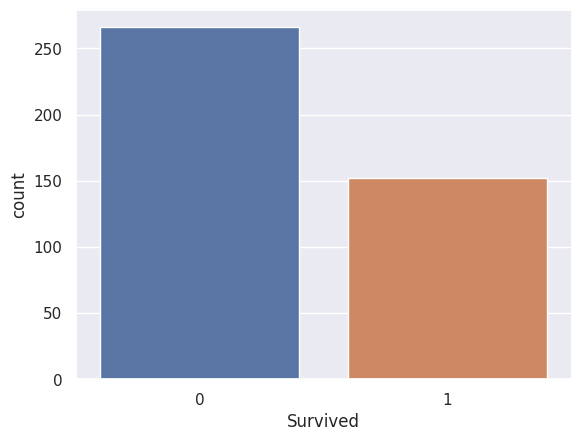

In [23]:
sns.countplot(x = 'Survived', data = titanic)

<Axes: xlabel='Survived', ylabel='count'>

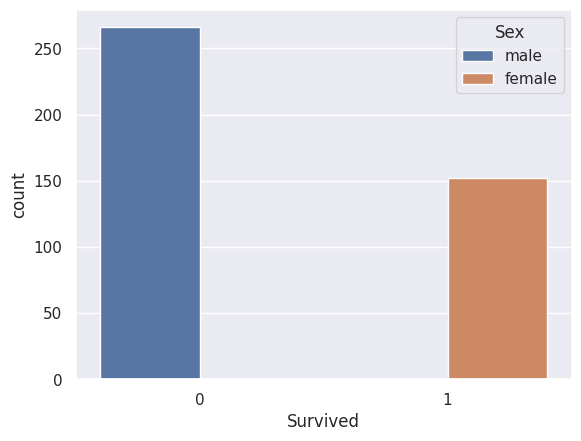

In [24]:
# To know who survived - males and females
sns.countplot(x = 'Survived', hue = 'Sex', data = titanic)

<Axes: xlabel='Survived', ylabel='count'>

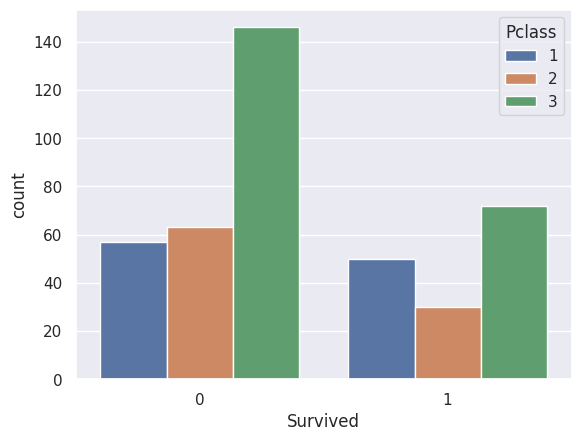

In [25]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = titanic)

<Axes: xlabel='Pclass', ylabel='Age'>

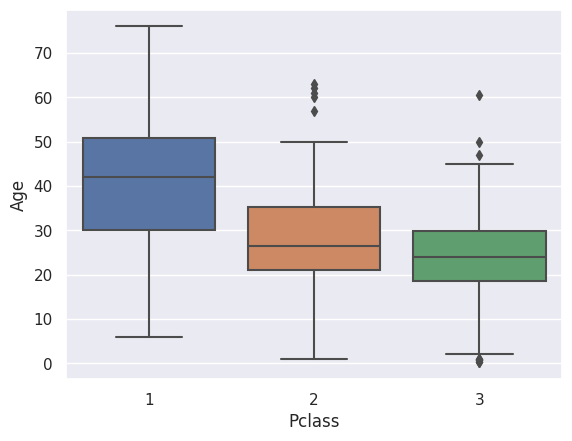

In [26]:
sns.boxplot(x ="Pclass", y="Age",data = titanic)

In [27]:
print((titanic['Survived']==1).sum())
print((titanic['Survived']==0).sum())

152
266


In [28]:
survived = titanic[titanic['Survived']==1]

In [29]:
survived.head()

,Survived,Pclass,Sex,Age,Fare
1,1,3,female,47.0,7.0000
4,1,3,female,22.0,12.2875
6,1,3,female,30.0,7.6292
8,1,3,female,18.0,7.2292
12,1,1,female,23.0,82.2667


In [30]:
titanic['AgeGrp'] = pd.cut(titanic['Age'], bins=[-np.inf,17, 39, 59, np.inf], labels=["Children","Youth","MiddleAged","SeniorCitizens"])

In [31]:
titanic['AgeGrp'].value_counts()

Youth             209
MiddleAged         68
Children           41
SeniorCitizens     14
Name: AgeGrp, dtype: int64

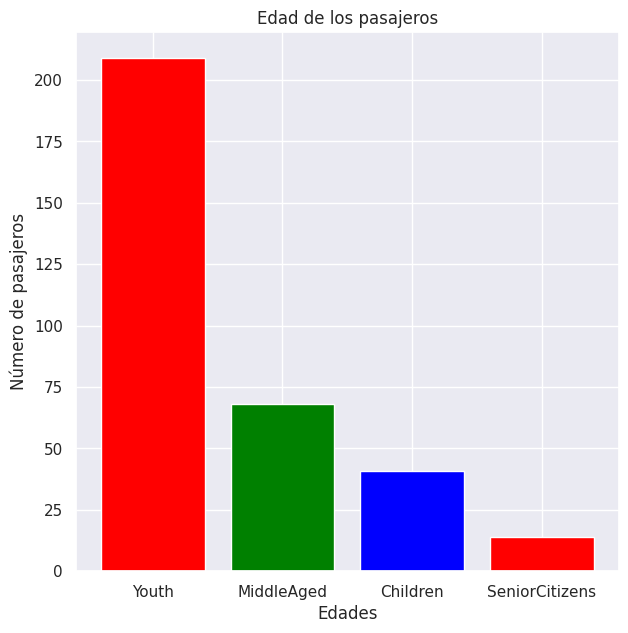

In [33]:
plt.figure(figsize=(7,7))
plt.xlabel("Edades")
plt.ylabel("Número de pasajeros")
plt.title("Edad de los pasajeros")
plt.bar(titanic['AgeGrp'].value_counts().keys(),titanic['AgeGrp'].value_counts().values, color=['red','green','blue'])
plt.show()